In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('transaction_data.csv')
df

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile
...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,1/17/2025 10:49,Success,False,"35.6895 N, -118.2437 W",Mobile
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,1/17/2025 11:00,Failed,True,"55.7558 N, 37.6173 W",Mobile
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,1/17/2025 10:54,Success,False,"34.0522 N, 139.6917 W",Desktop
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,1/17/2025 10:59,Success,True,"51.5074 N, 139.6917 W",Mobile


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 71.4+ KB


In [4]:
# Data Exploration 
# Numerical Data in the data set

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


In [5]:
# Summary of the Categorical data in the dataset

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].describe()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Type,Timestamp,Transaction Status,Geolocation (Latitude/Longitude),Device Used
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,994,994,3,60,2,36,2
top,TXN3992032184,ACC89865,ACC51744,Transfer,1/17/2025 10:55,Failed,"48.8566 N, 139.6917 W",Mobile
freq,1,2,2,374,28,513,42,521


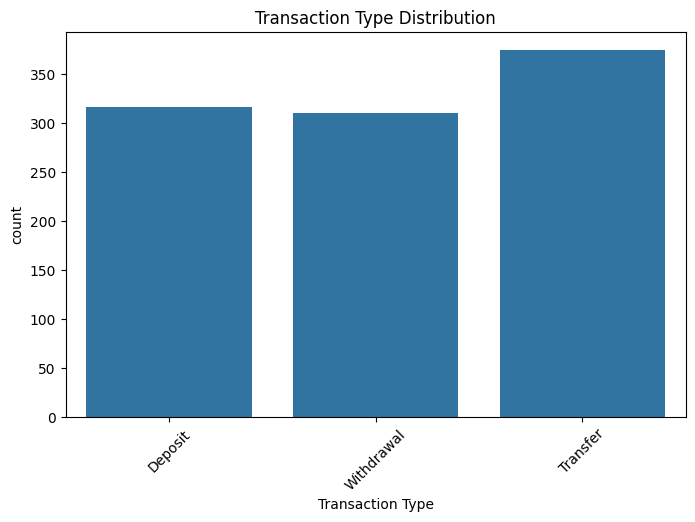

In [8]:
# Transaction Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Transaction Type')
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()


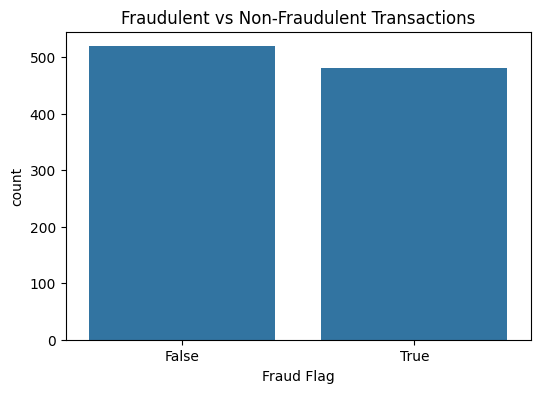

In [9]:
# Fraud Flag Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Fraud Flag')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()


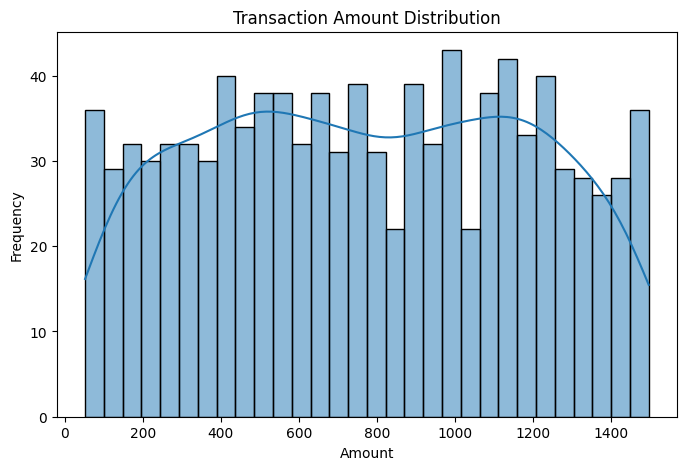

In [10]:
# Transaction Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Transaction Amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [16]:
#2
print("Summary Before Cleaning:")
df.describe()


Summary Before Cleaning:


,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


In [24]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [28]:
#Removing noisy data (outliers in transaction amount)

Q1 = df["Transaction Amount"].quantile(0.25)
Q3 = df["Transaction Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Transaction Amount"] >= lower_bound) & (df["Transaction Amount"] <= upper_bound)]



In [29]:
df.describe()

,Transaction Amount
count,1000.00000
mean,771.16529
std,411.01925
min,51.89000
25%,423.34750
50%,761.65500
75%,1122.67250
max,1497.76000


C:\Users\Adarsh Yerneni\AppData\Local\Temp\ipykernel_10436\1183635892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Device Used", palette="magma")


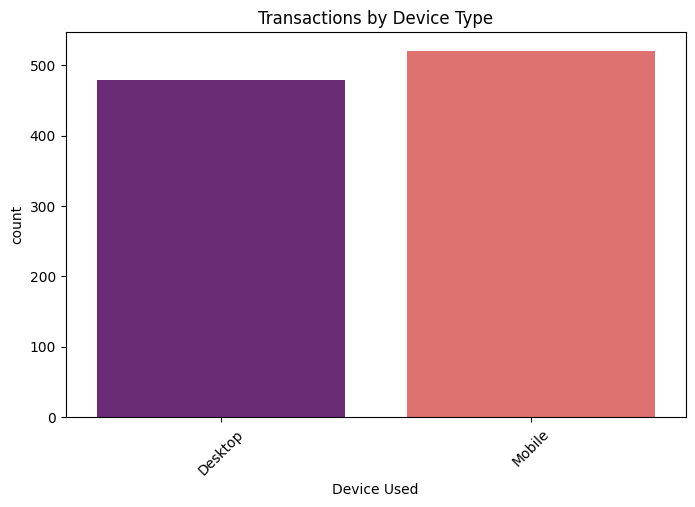

In [30]:
#3
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Device Used", palette="magma")
plt.title("Transactions by Device Type")
plt.xticks(rotation=45)
plt.show()




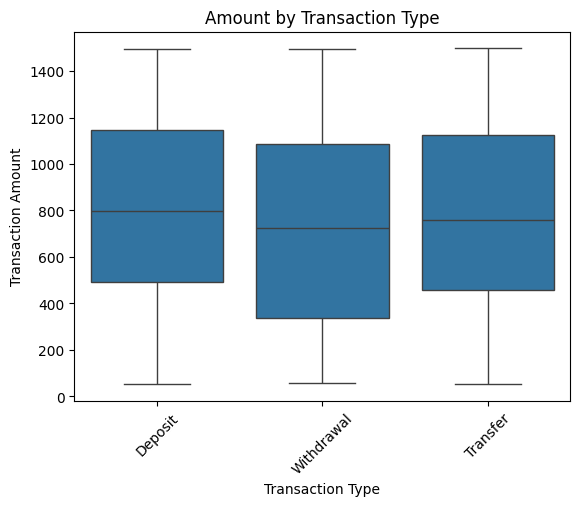

In [37]:
#type and amount of transaction
sns.boxplot(data=df, x='Transaction Type', y='Transaction Amount')
plt.title("Amount by Transaction Type")
plt.xticks(rotation=45)
plt.show()

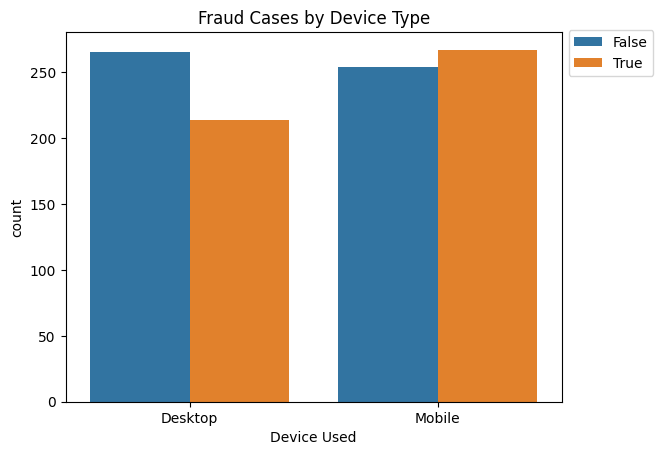

In [44]:
#devices used
sns.countplot(data=df, x='Device Used', hue='Fraud Flag')
plt.title("Fraud Cases by Device Type")
plt.legend(bbox_to_anchor=(1,1.025))
plt.show()

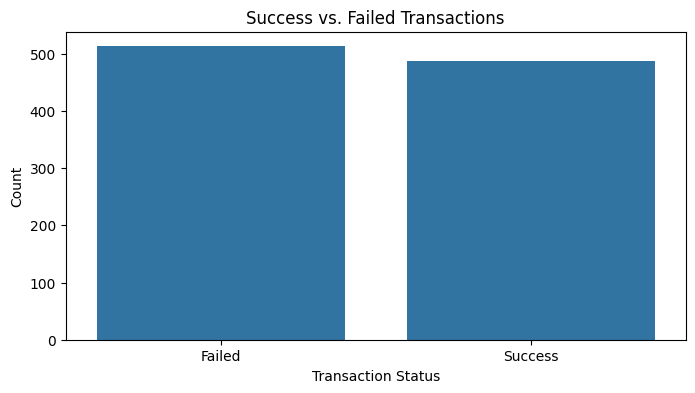

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Transaction Status")
plt.title("Success vs. Failed Transactions")
plt.xlabel("Transaction Status")
plt.ylabel("Count")
plt.show()


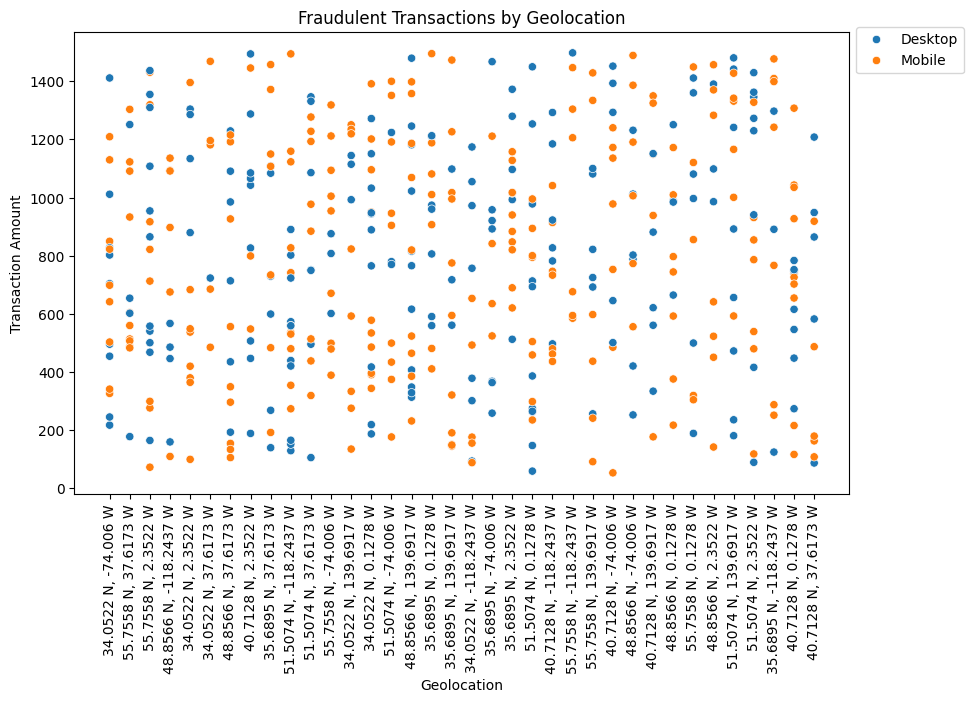

In [49]:

fraud_df = df[df["Fraud Flag"] == True]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fraud_df["Geolocation (Latitude/Longitude)"], y=fraud_df["Transaction Amount"], hue=fraud_df["Device Used"])
plt.xticks(rotation=90)
plt.title("Fraudulent Transactions by Geolocation")
plt.xlabel("Geolocation")
plt.ylabel("Transaction Amount")
plt.legend(bbox_to_anchor=(1,1.025))
plt.show()


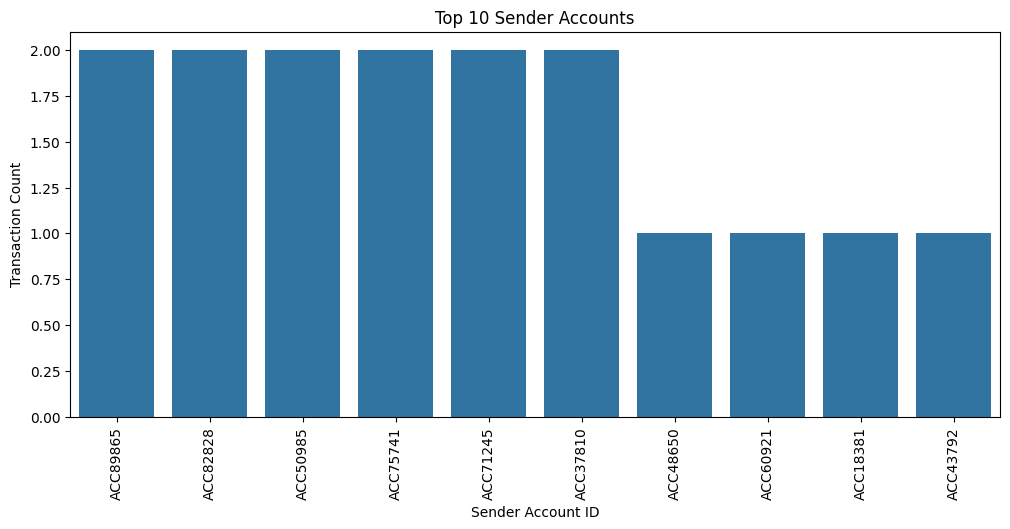

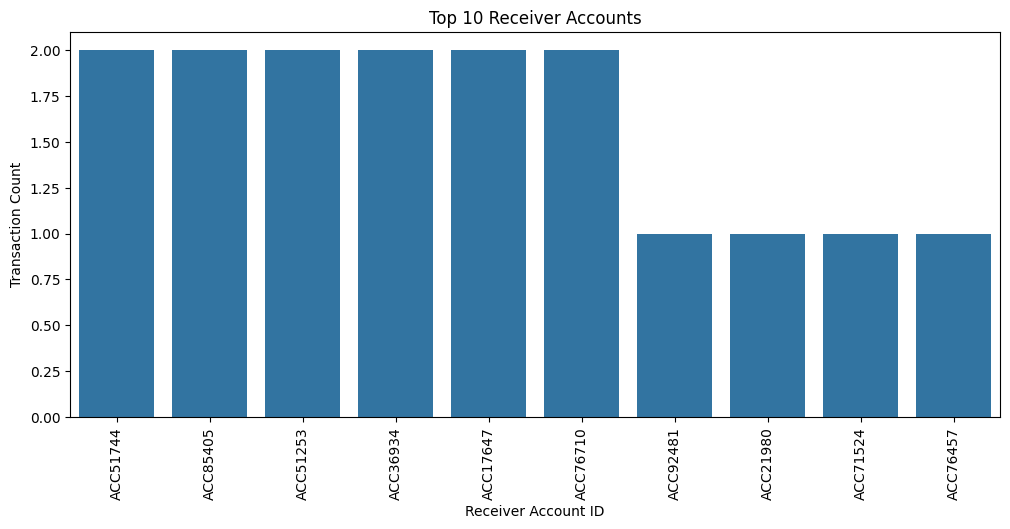

In [52]:
top_senders = df["Sender Account ID"].value_counts().head(10)
top_receivers = df["Receiver Account ID"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_senders.index, y=top_senders.values)
plt.title("Top 10 Sender Accounts")
plt.xlabel("Sender Account ID")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_receivers.index, y=top_receivers.values)
plt.title("Top 10 Receiver Accounts")
plt.xlabel("Receiver Account ID")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()



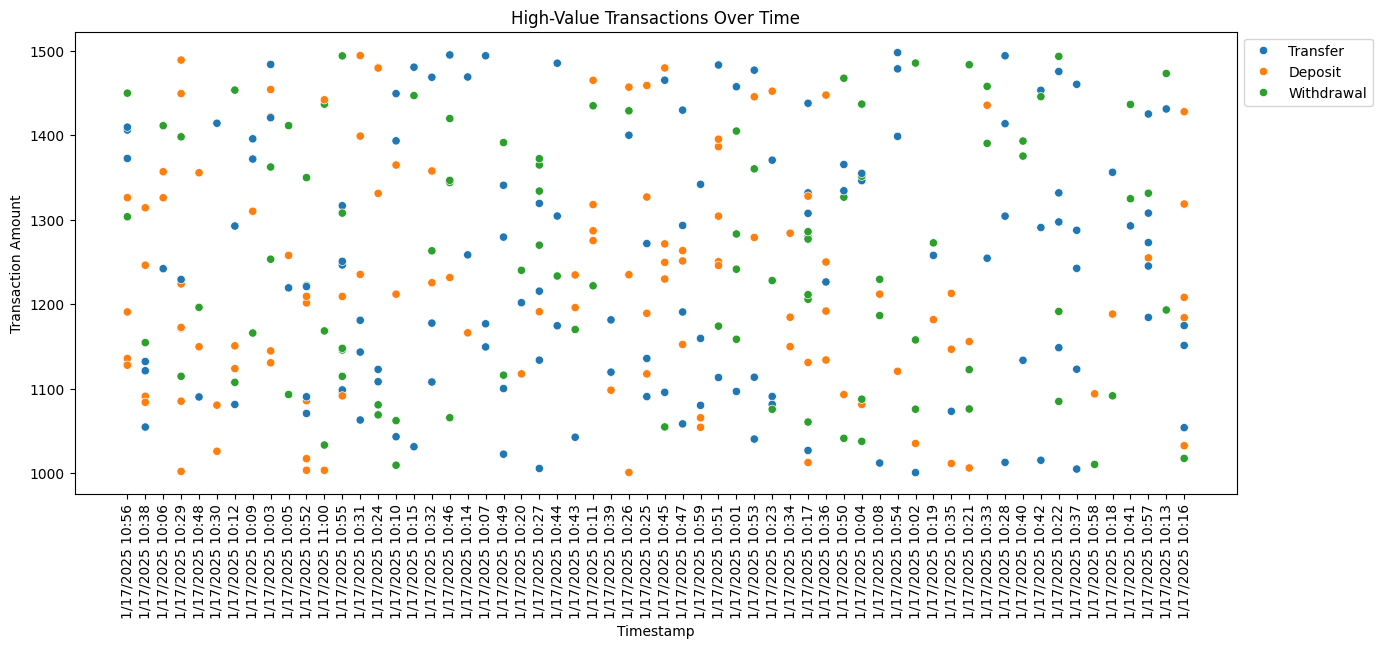

In [58]:
plt.figure(figsize=(15, 6))
high_value_df = df[df["Transaction Amount"] > 1000]
sns.scatterplot(x=high_value_df["Timestamp"], y=high_value_df["Transaction Amount"], hue=high_value_df["Transaction Type"])
plt.title("High-Value Transactions Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


C:\Users\Adarsh Yerneni\AppData\Local\Temp\ipykernel_10436\3829415243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["Fraud Flag"] == True], x="Transaction Type",palette = "magma")


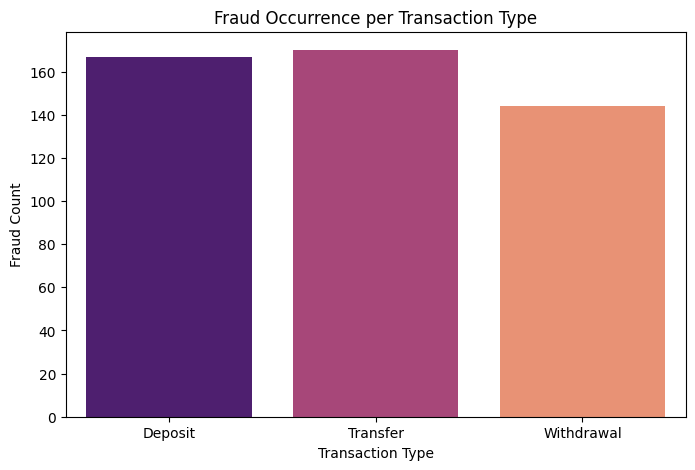

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df["Fraud Flag"] == True], x="Transaction Type",palette = "magma")
plt.title("Fraud Occurrence per Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.show()
